# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.361694e+01     1.557019e+01
 * time: 0.004117012023925781
     1     6.287094e+01     9.584598e+00
 * time: 0.011533975601196289
     2     5.664694e+01     1.060285e+01
 * time: 0.029618024826049805
     3     3.911062e+01     9.106360e+00
 * time: 0.055299997329711914
     4     2.623249e+01     7.439814e+00
 * time: 0.17058706283569336
     5     1.491656e+01     2.943740e+00
 * time: 0.19297099113464355
     6     1.429697e+01     4.658553e+00
 * time: 0.20761799812316895
     7     1.149122e+01     4.704758e+00
 * time: 0.22669410705566406
     8     9.193960e+00     3.779512e+00
 * time: 0.2543480396270752
     9     8.970685e+00     4.043389e+00
 * time: 0.2771580219268799
    10     8.445010e+00     4.112808e+00
 * time: 0.29513001441955566
    11     7.884085e+00     3.327753e+00
 * time: 0.310715913772583
    12     7.243686e+00     2.170615e+00
 * time: 0.3791670799255371
    13     6.747278e+00     2.313345e+00
 * time: 

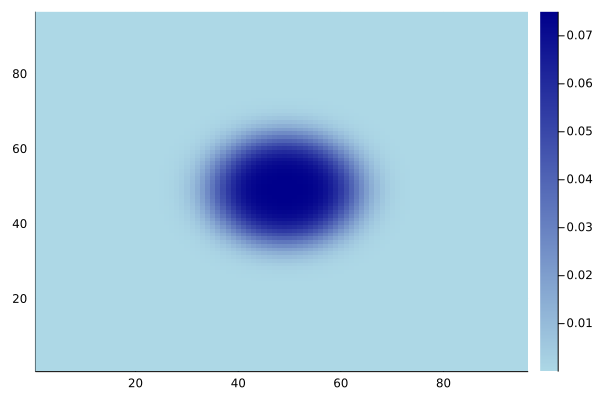

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))